In [1]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

In [2]:
# Set the seed for the random number generator for reproducibility
np.random.seed(32)


# Function to plot the Beta distributions based on alpha and beta parameters
def plot_beta_distributions(alphas, betas, colors, labels):
    x = np.linspace(0, 1, 100)
    for a, b, c, label in zip(alphas, betas, colors, labels):
        y = beta.pdf(x, a, b)
        plt.plot(x, y, c, label=f"{label} (α={a}, β={b})")
    plt.title('Beta Distributions of Options')
    plt.xlabel('Probability of Success (θ)')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()

In [3]:
# Initial parameters for alpha and beta for each option
alphas = [1, 1, 1]  # Assuming uniform priors (α=1 for a uniform prior)
betas = [1, 1, 1]   # Assuming uniform priors (β=1 for a uniform prior)
colors = ['r', 'b', 'g']
labels = ['Red', 'Blue', 'Other']

In [4]:
# Function to simulate one trial for a given option
def simulate_trial(option, true_success_rates):
    success = np.random.rand() < true_success_rates[option]
    return 1 if success else 0

In [5]:
# Function to update alpha and beta parameters after a trial
def update_parameters(option, result, alphas, betas):
    alphas[option] += result
    betas[option] += 1 - result
    return alphas, betas

In [6]:
# Function to run multiple simulations and update parameters
def run_simulations(num_trials, true_success_rates, alphas, betas):
    for _ in range(num_trials):
        for option in range(3):
            result = simulate_trial(option, true_success_rates)
            alphas, betas = update_parameters(option, result, alphas, betas)
    return alphas, betas

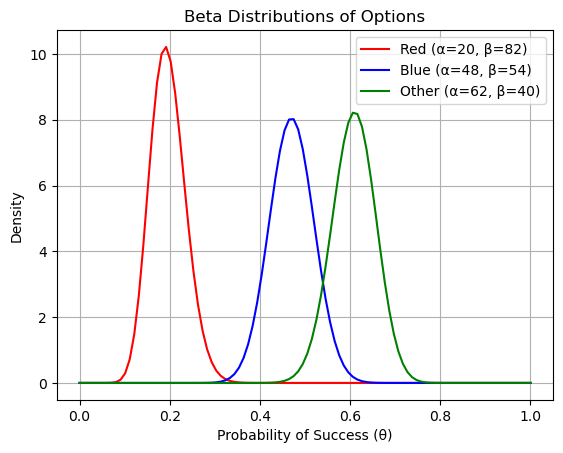

([20, 48, 62], [82, 54, 40])

In [7]:
# Set true success rates for simulation purposes
true_success_rates = [0.2, 0.4, 0.6]  # These are unknown in real scenarios

# Number of trials to simulate for each option
num_trials = 100

# Run the simulations
alphas, betas = run_simulations(num_trials, true_success_rates, alphas, betas)

# Plot the updated Beta distributions after multiple trials
plot_beta_distributions(alphas, betas, colors, labels)

# Return the updated alphas and betas
alphas, betas

In [8]:
# After analyzing the posterior Beta distributions resulting from the simulation, 
# it is evident that the 'Other' option presents the highest expected probability of success 
# with a posterior mean of approximately α/(α+β) = 62/(62+40) ≈ 0.61. 

# Moreover, the 'Other' distribution is the most narrow among the three options, 
# indicating a higher degree of certainty about the estimated success rate. 

# Therefore, based on the evidence from this simulation, I would choose the 'Other' option for the next trial 
# as it seems to offer the best balance of high probability of success and lower uncertainty.